In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def readDF(path = 'Task_data_EURUSD.csv', nRows = None):
    df = pd.read_csv(path, delimiter = ';')
    return df.iloc[0:nRows]

def write(df, name = 'Data_before_interpolution'):
    txt = open(name + '.txt', 'w')
    txt.write(df.to_string())    
        
def setForInterp(a = -5, b = 5, chebyshev = False, n = 10):
    f = lambda x: -np.sinc(1.5 * x)
    
    if chebyshev == True:
        x = [((a + b) / 2) + ((b - a) * np.cos((2 * i - 1) * np.pi / (2 * n)) / 2) \
            for i in range (1, n + 1)]
        y = np.zeros(len(x))
        for i in range(len(x)):
            y[i] = f(x[i])
    else:
        x = np.linspace(a, b, n)
        y = np.array(f(x))
    
    df = pd.DataFrame({'x': x,\
                       'y': y})
    return df

def polynominalSet(set = setForInterp(n = 10), n = 20):
    # Возвращет набор данных, интерполированных полиномом Лагранжа.
    x = set['x']
    y = set['y']
    a = min(x)
    b = max(x)
    t = np.linspace(a, b, n)
    
    def lagrangianPol(x, y, t):
        # Интерполяционный полином Лагранжа.
        p = 0
        for i in range(len(x)):
            li = 1
            for j in range(len(x)):
                if j != i:
                    li *= (t - x[j]) / (x[i] - x[j])
            p += y[i] * li 
        return p
    
    df = pd.DataFrame({'x': t,
                       'y': lagrangianPol(x, y, t)})
    return df
        
def draw(*df, drawtype = 'data', col1 = 'x', col2 = 'y', color = None, linestyle = None, layers = []):
    fig = plt.figure(figsize = (10, 5))
    plot = fig.add_subplot()
    
    if drawtype == 'data':
        plot.set_xlabel(col1, fontsize = 14)
        plot.set_ylabel(col2, fontsize = 14)
        for i in range(len(df)):
            plot.scatter(df[i][col1], df[i][col2], marker = 'x', color = 'r')
    
    elif drawtype == 'ExchangeRates':
        col1 = None
        for i in range(len(df)):
            plot.plot(df[i][col2], label = col2)

    elif drawtype == 'regr':
        for i in range(len(df)):
            for col2 in layers:
                plot.plot(df[i][col1], df[i][col2], color = color, linestyle = linestyle, label = col2)
        plot.set_ylim(1.15, 1.23)
        plot.legend(fontsize = 14)
        
    elif drawtype == 'dataframes':
        for i in range(len(df)):
            if i != 0:
                plot.scatter(df[i][col1], df[i][col2], marker = 'o', color = color[i])
            else:
                plot.plot(df[i][col1], df[i][col2], linestyle = '--', marker = 'x', color = color[i])
        plot.set_ylim(-1.6, 1.4)
        
    return plot

def regr(df):
    x = np.array([i for i in range (1, 15)]).reshape(-1, 1)
    y = np.array(df['<CLOSE>'][:14])
    
    model = LinearRegression()
    
    quad_reg = PolynomialFeatures(degree = 2)
    three_reg = PolynomialFeatures(degree = 3)
    
    x_quad = quad_reg.fit_transform(x)
    x_three = three_reg.fit_transform(x)
    x_new = np.append(x, np.array([i for i in range(len(x)+1, len(x)+11)])).reshape(-1,1)
    #
    model = model.fit(x, y)
    lineR2 = model.score(x, y)
    y_line_new = model.predict(x_new)
    #
    model = model.fit(x_quad, y)
    quadR2 = model.score(x_quad, y)
    x_quad_new = quad_reg.fit_transform(x_new)
    y_quad_new = model.predict(x_quad_new)
    #
    model = model.fit(x_three, y)
    threeR2 = model.score(x_three, y)
    x_three_new = three_reg.fit_transform(x_new)
    y_three_new = model.predict(x_three_new)
    
    dfnew = pd.DataFrame({'days': (int(x_new[i]) for i in range(len(x_new))), \
                          'linear': (y_line_new[i] for i in range(len(y_line_new))), \
                          'quad': (y_quad_new[i] for i in range(len(y_line_new))), \
                          'three': (y_three_new[i] for i in range(len(y_line_new))),
                          'linearErr': lineR2, 'quadErr': quadR2, 'threeErr': threeR2})
    df = pd.concat([df, dfnew], axis = 1)
    return df

# Task 1
## the exercise 1.1

In [2]:
polynominalSet(setForInterp(a = -5, b = 5, chebyshev = True, n = 10), n = 10)

,x,y
0,-4.938442,0.041175
1,-3.841010,0.018846
2,-2.743579,0.083114
3,-1.646147,0.104597
4,-0.548716,0.148680
5,0.548716,0.148680
6,1.646147,0.104597
7,2.743579,0.083114
8,3.841010,0.018846
9,4.938442,0.041175


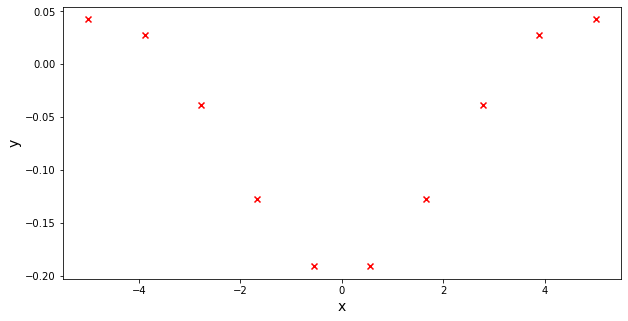

In [3]:
draw(setForInterp(n = 10))
write(setForInterp(n = 10))

<AxesSubplot:>

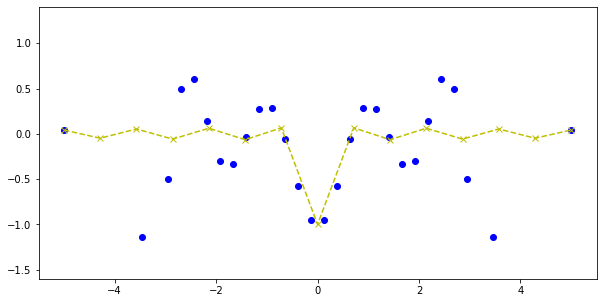

In [4]:
draw(setForInterp(n = 15), polynominalSet(setForInterp(n = 15), n = 40), drawtype = 'dataframes', \
     col1 = 'x', col2 = 'y', color = ['y','b'], linestyle = None, layers = [])

<AxesSubplot:>

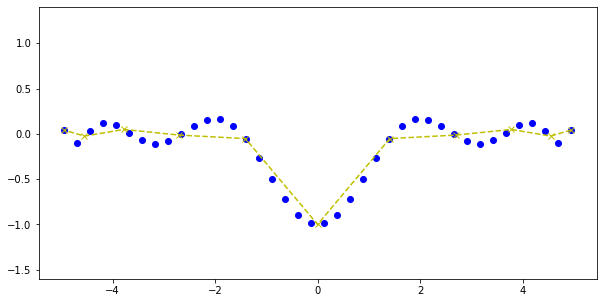

In [5]:
draw(setForInterp(chebyshev = True, n = 11), polynominalSet(setForInterp(chebyshev = True, n = 11), n = 40),\
     drawtype = 'dataframes', col1 = 'x', col2 = 'y', color = ['y','b'], linestyle = None, layers = [])